# Classification Approch

In [30]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline


#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.cluster import DBSCAN

from tqdm import tqdm

## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

In [2]:
#filename = #import model approch for  joblib


In [66]:
cols = ['Season','Age','Childish diseases','Trauma','Surgical','High fever','Alcohol consumption','Smoking','Sitting hour/day','Output']
df= pd.read_csv('../fertility_Diagnosis.txt',names=cols)
df
df['Output'].value_counts()

Output
N    88
O    12
Name: count, dtype: int64

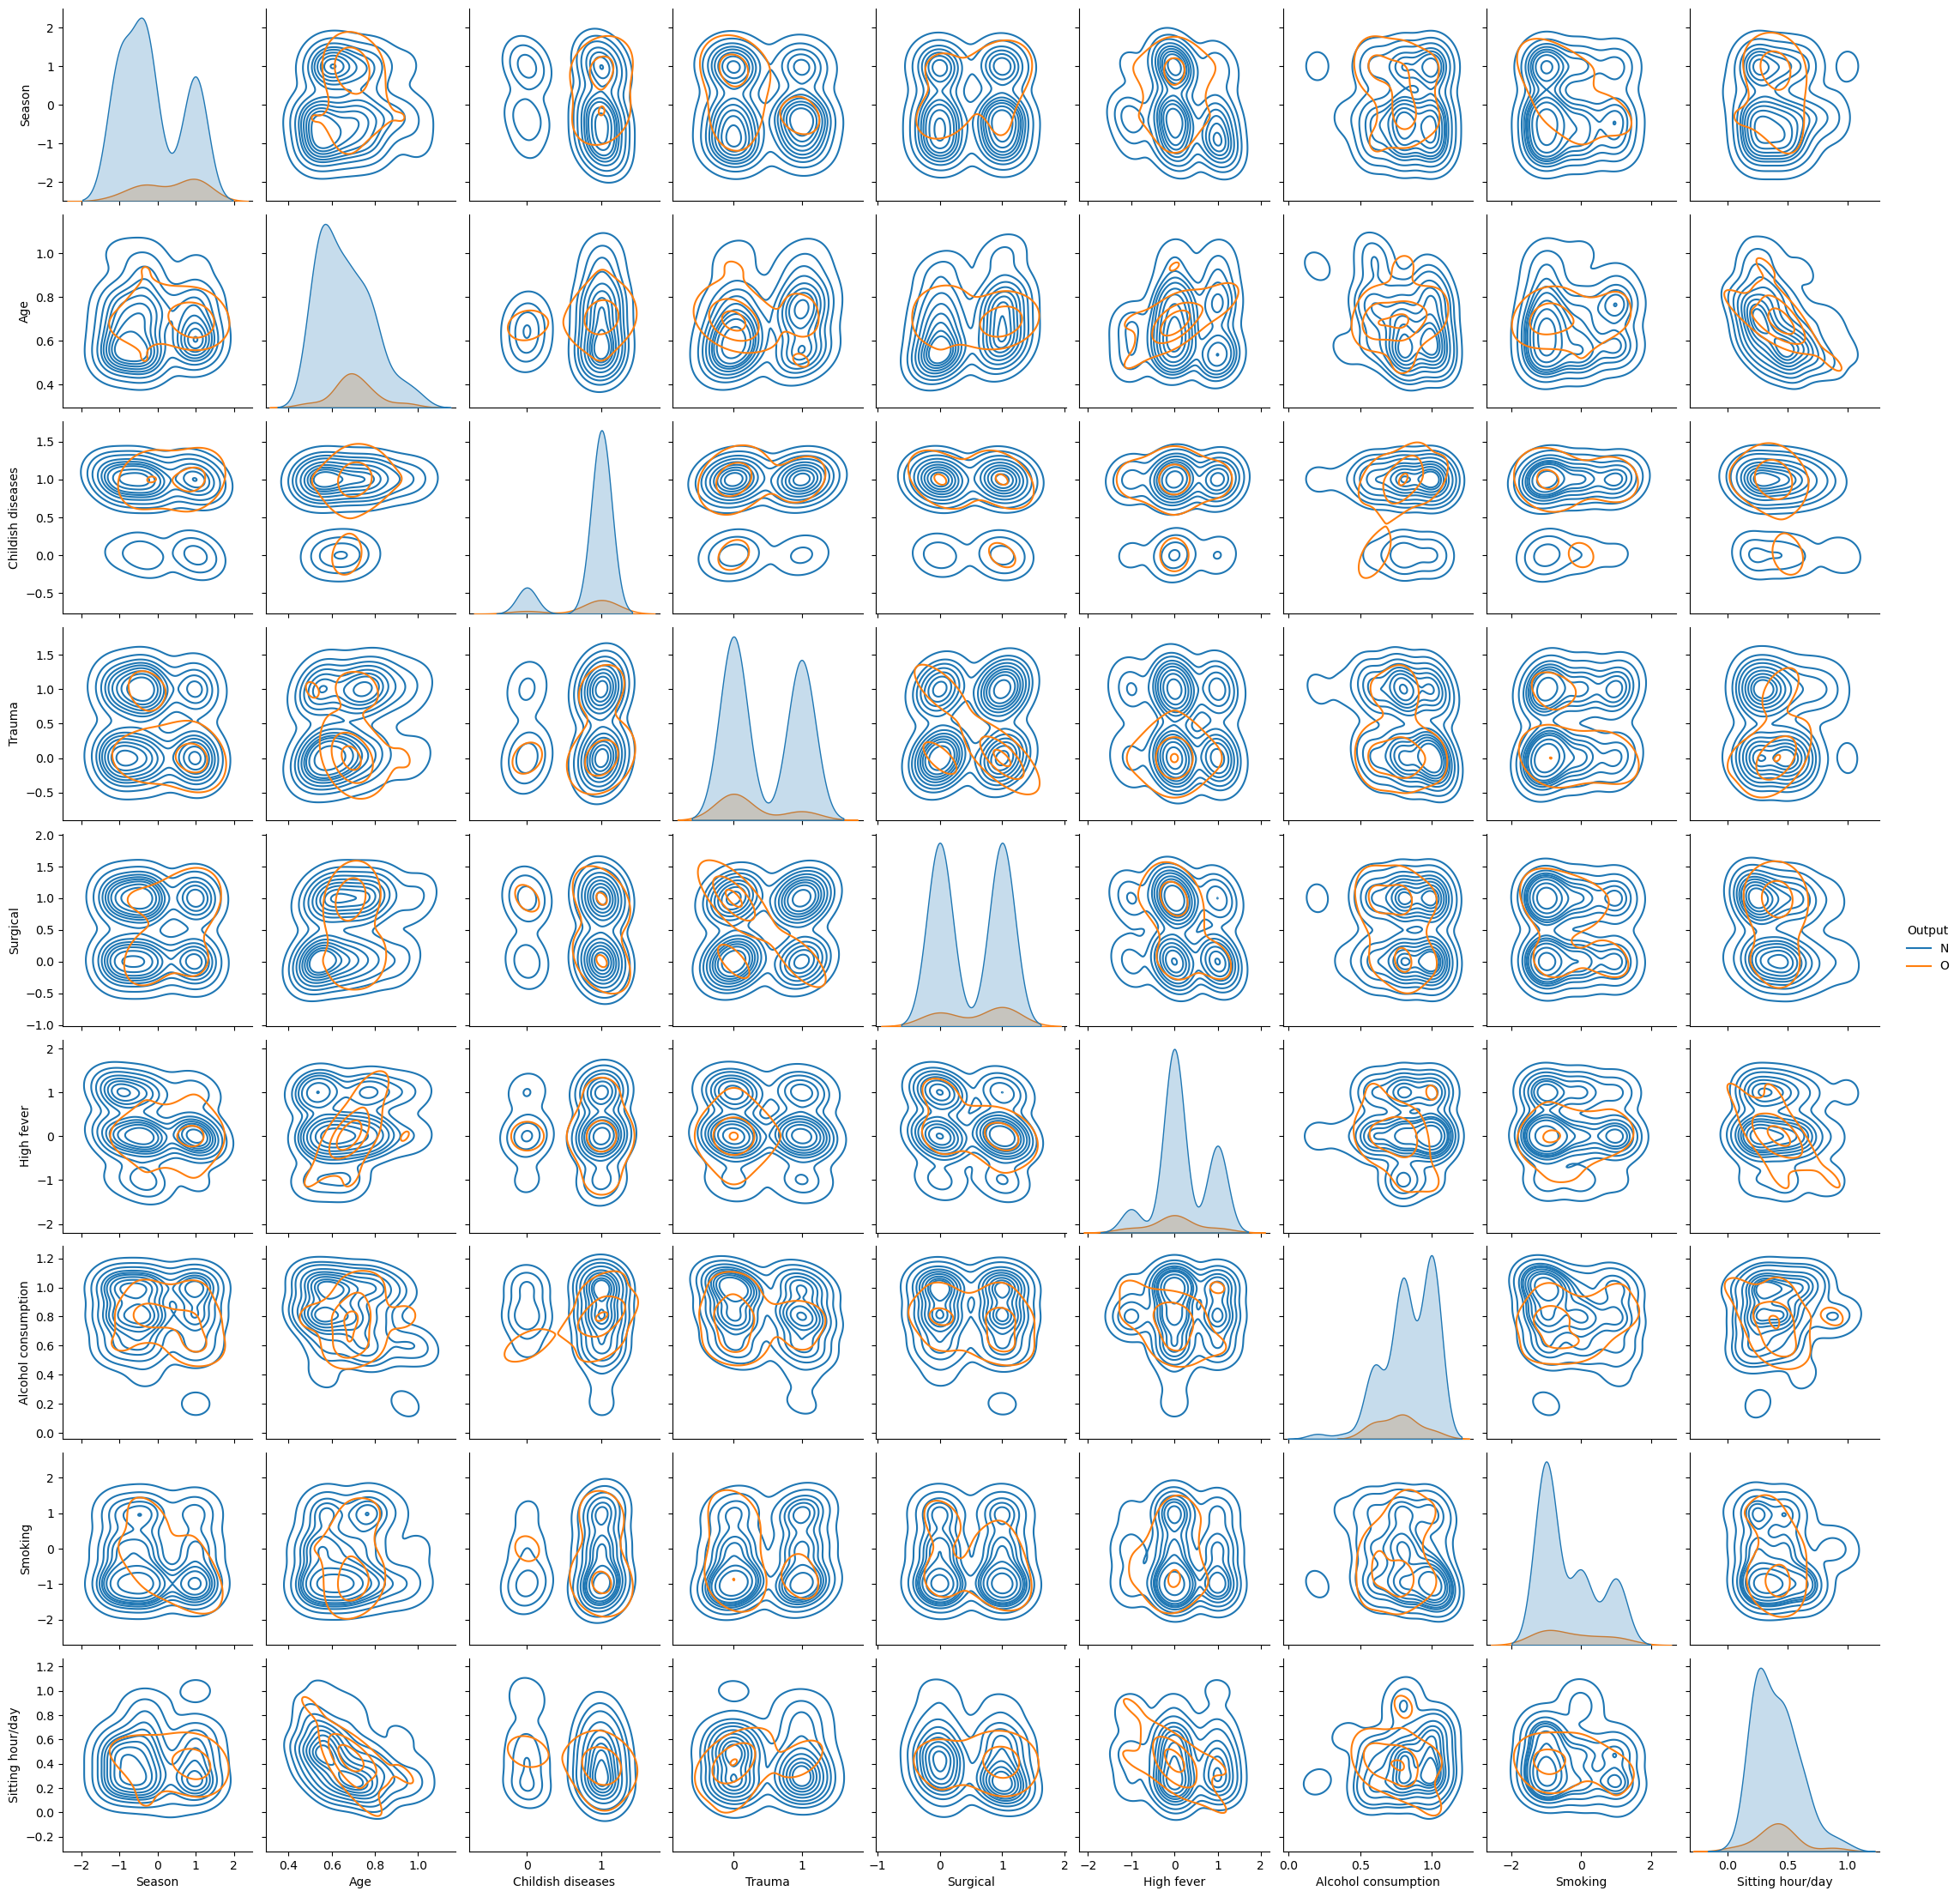

In [6]:
sns.pairplot(data=df,kind='kde', hue='Output')

### PreProcess


In [8]:
df['Output'] = df['Output'].map({'N':1,'O':-1})


In [10]:
X = df.drop(['Output'],axis=1)
y = df['Output']

#### Scaler


In [31]:
scale = StandardScaler()
scale_X= scale.fit_transform(X)

### Model

In [28]:
dbscan = DBSCAN()


In [17]:
#help(dbscan)

Help on StandardScaler in module sklearn.preprocessing._data object:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |
 |  Standardize features by removing the mean and scaling to unit variance.
 |
 |  The standard score of a sample `x` is calculated as:
 |
 |      z = (x - u) / s
 |
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not

In [36]:
#param value
eps = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
min_samples = [1,3,5,7,9]
outlier_percent = []
number_of_outliers = []

In [74]:
outlier_percent = []
number_of_outliers = []
eps = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

for i in tqdm(np.linspace(0.001,10,10000)):
    #for j in min_samples:
        # Create Model
        dbscan = DBSCAN(eps=i,metric='')
        dbscan.fit(X)
        
        # Log Number of Outliers
        number_of_outliers.append(np.sum(dbscan.labels_ == -1))
        
        # Log percentage of points that are outliers
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
        
        outlier_percent.append(perc_outliers)

  0%|                                                 | 0/10000 [00:00<?, ?it/s]


InvalidParameterError: The 'metric' parameter of DBSCAN must be a str among {'hamming', 'braycurtis', 'cityblock', 'l1', 'russellrao', 'cosine', 'matching', 'precomputed', 'chebyshev', 'sokalsneath', 'correlation', 'haversine', 'sokalmichener', 'seuclidean', 'jaccard', 'minkowski', 'nan_euclidean', 'sqeuclidean', 'euclidean', 'l2', 'manhattan', 'wminkowski', 'rogerstanimoto', 'canberra', 'yule', 'dice', 'mahalanobis'} or a callable. Got '' instead.

#### Create Model(s)

In [54]:
print(len(outlier_percent))
print(len(number_of_outliers))

10000
10000


Text(0.5, 0, 'Epsilon Value')

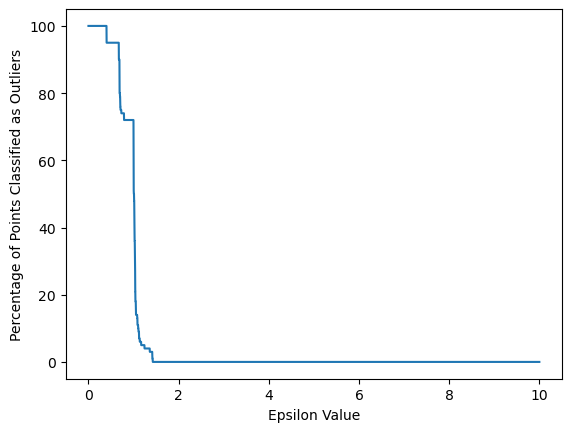

In [56]:
sns.lineplot(x=np.linspace(0.001,10,10000),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [73]:
number_of_outliers.index(11)


1086

(0.0, 5.0)

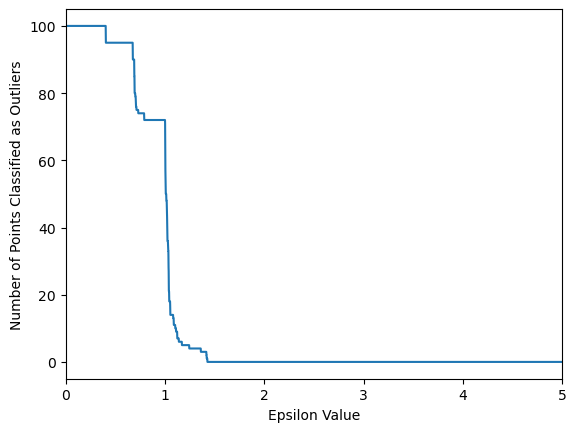

In [68]:
sns.lineplot(x=np.linspace(0.001,10,10000),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,5)
#plt.ylim(3,5)

In [24]:
model = GridSearchCV(estimator=pipe,param_grid=param, scoring='accuracy',cv=5)

#### Train Model

In [25]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 370, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('db', DBSCAN())]),
             param_grid={'db__eps': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                     0.9, 1],
                         'db__min_samples': [1, 3, 5, 7, 9]},
             scoring='accuracy')

### Evaluate model

In [26]:
y_pred = model.predict(X_test)

AttributeError: This 'GridSearchCV' has no attribute 'predict'

#### Test On data

### Final Model(s)


#### Train on all Data 

##### no need

#### Save with joblib

In [22]:
import joblib
joblib.dump(value=full_model,filename=filename)

# Congratulations!!!

#### Created and trained by  Matin1099.
